## Predicting growth of Spotify Song Popularity over time

The goal of this notebook is to predict growth or decline of Spotify song popularity over time

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

import time
import seaborn as sns
from matplotlib import pyplot as plt

### Load and Integrate Data

First, we have to integrate two data sets - Spotify Audio Features from April 2019 and Spotify Audio features from November 2018.
We can then add a column for the difference between the popularity in November and April

In [2]:
data1 = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')
data2 = pd.read_csv('SpotifyAudioFeaturesNov2018.csv')

Let's check if both datasets were loaded in correctly

In [3]:
data1.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [4]:
data2.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,44
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,10
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,63
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,9
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,8


Both datasets loaded fine. Now it's time to integrate them.

In [5]:
# Columns to join on
join_col = ['artist_name','track_id', 'track_name','acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']

data = data1.merge(data2, how='outer', on=join_col)

In [6]:
data.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_x,popularity_y
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15.0,44.0
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0.0,10.0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56.0,63.0
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0.0,9.0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0.0,8.0


### Observe and Clean the data

Let's see if everything looks fine

In [7]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_x,popularity_y
count,131376.000000,131376.000000,1.313760e+05,131376.000000,131376.000000,131376.000000,131376.000000,131376.000000,131376.000000,131376.000000,131376.000000,131376.000000,131376.000000,130663.000000,116372.000000
mean,0.342345,0.581647,2.126669e+05,0.569302,0.223437,5.232417,0.194892,-9.965495,0.607790,0.112034,119.476186,3.879126,0.439655,24.208988,24.235082
std,0.345566,0.190014,1.229724e+05,0.260253,0.360052,3.602772,0.167738,6.542084,0.488245,0.124301,30.151933,0.514102,0.258975,19.713191,17.931939
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.640020e+05,0.396000,0.000000,2.000000,0.097500,-11.886000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000,10.000000
50%,0.203000,0.605000,2.019270e+05,0.603000,0.000143,5.000000,0.124000,-7.968000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000,22.000000
75%,0.636000,0.727000,2.410210e+05,0.775000,0.436000,8.000000,0.236000,-5.679000,1.000000,0.129000,139.655000,4.000000,0.638000,38.000000,35.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000,100.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131376 entries, 0 to 131375
Data columns (total 18 columns):
artist_name         131376 non-null object
track_id            131376 non-null object
track_name          131376 non-null object
acousticness        131376 non-null float64
danceability        131376 non-null float64
duration_ms         131376 non-null int64
energy              131376 non-null float64
instrumentalness    131376 non-null float64
key                 131376 non-null int64
liveness            131376 non-null float64
loudness            131376 non-null float64
mode                131376 non-null int64
speechiness         131376 non-null float64
tempo               131376 non-null float64
time_signature      131376 non-null int64
valence             131376 non-null float64
popularity_x        130663 non-null float64
popularity_y        116372 non-null float64
dtypes: float64(11), int64(4), object(3)
memory usage: 19.0+ MB


Notice that there are some Null values out there. Since this is a small portion of the dataset, we can drop them to avoid complications. Also, we can drop track_id and convert milliseconds to seconds, like we did in our other notebook.

In [9]:
data = data.drop(['track_id'], axis = 1)

In [10]:
data['duration_seconds'] = data['duration_ms'] / 1000
data[['artist_name', 'track_name', 'duration_seconds']].head()

,artist_name,track_name,duration_seconds
0,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",238.373
1,YG,BAND DRUM (feat. A$AP Rocky),214.800
2,R3HAB,Radio Silence,138.913
3,Chris Cooq,Lactose,125.381
4,Chris Cooq,Same - Original mix,124.016


In [11]:
data = data.drop(['duration_ms'], axis = 1)
data.head()

,artist_name,track_name,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_x,popularity_y,duration_seconds
0,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15.0,44.0,238.373
1,YG,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0.0,10.0,214.800
2,R3HAB,Radio Silence,0.025000,0.603,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56.0,63.0,138.913
3,Chris Cooq,Lactose,0.029400,0.800,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0.0,9.0,125.381
4,Chris Cooq,Same - Original mix,0.000035,0.783,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0.0,8.0,124.016


Checking for duplicates

In [12]:
len(data) - len(data.drop_duplicates())

0

Checking for how many null values there are

In [13]:
len(data) - len(data.dropna())

15717

Let's drop these rows, it's possible this happened because some songs weren't released in 2018

In [14]:
data = data.dropna()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115659 entries, 0 to 130662
Data columns (total 17 columns):
artist_name         115659 non-null object
track_name          115659 non-null object
acousticness        115659 non-null float64
danceability        115659 non-null float64
energy              115659 non-null float64
instrumentalness    115659 non-null float64
key                 115659 non-null int64
liveness            115659 non-null float64
loudness            115659 non-null float64
mode                115659 non-null int64
speechiness         115659 non-null float64
tempo               115659 non-null float64
time_signature      115659 non-null int64
valence             115659 non-null float64
popularity_x        115659 non-null float64
popularity_y        115659 non-null float64
duration_seconds    115659 non-null float64
dtypes: float64(12), int64(3), object(2)
memory usage: 15.9+ MB


### Creating a popularity growth column

Now, we should rename popularity_x to popularity_April_2019 and popularity_y to popularity_Nov_2018, so it's easier to read. After that, we can add a column called "popularity_growth", which is positive if the song became more popular, and negative if the song became less popular. 

In [16]:
data = data.rename(columns={'popularity_x': 'popularity_april_2019', 'popularity_y': 'popularity_nov_2018'})
data[['artist_name', 'track_name', 'popularity_april_2019', 'popularity_nov_2018']].head()

,artist_name,track_name,popularity_april_2019,popularity_nov_2018
0,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",15.0,44.0
1,YG,BAND DRUM (feat. A$AP Rocky),0.0,10.0
2,R3HAB,Radio Silence,56.0,63.0
3,Chris Cooq,Lactose,0.0,9.0
4,Chris Cooq,Same - Original mix,0.0,8.0


In [17]:
data['popularity_growth'] = data['popularity_april_2019'] - data['popularity_nov_2018']
data[['artist_name', 'track_name', 'popularity_april_2019', 'popularity_nov_2018', 'popularity_growth']].head()

,artist_name,track_name,popularity_april_2019,popularity_nov_2018,popularity_growth
0,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",15.0,44.0,-29.0
1,YG,BAND DRUM (feat. A$AP Rocky),0.0,10.0,-10.0
2,R3HAB,Radio Silence,56.0,63.0,-7.0
3,Chris Cooq,Lactose,0.0,9.0,-9.0
4,Chris Cooq,Same - Original mix,0.0,8.0,-8.0


Hmm...they all seem to be negative growth. How many songs are actually growing in popularity?

In [18]:
data[data['popularity_growth'] >= 0][['artist_name', 'track_name', 'popularity_april_2019', 'popularity_nov_2018', 'popularity_growth']]

,artist_name,track_name,popularity_april_2019,popularity_nov_2018,popularity_growth
45,Burbank,Waiting for U,31.0,29.0,2.0
46,PJ Lucid,Martyr Luther King,41.0,36.0,5.0
48,Betty Who,Friend Like Me,44.0,40.0,4.0
49,Your Smith,The Spot,48.0,48.0,0.0
50,Snow Patrol,Heal Me,53.0,53.0,0.0
51,Dirty Projectors,Blue Bird,37.0,37.0,0.0
53,Code Orange,The Hunt (feat. Corey Taylor),44.0,41.0,3.0
54,Demun Jones,Sound on the Water,40.0,39.0,1.0
56,Trevor Hall,Free,42.0,40.0,2.0
58,UNB,BLACK HEART,47.0,47.0,0.0


That's a good amount.

Let's see if a correlation matrix tells us anything.

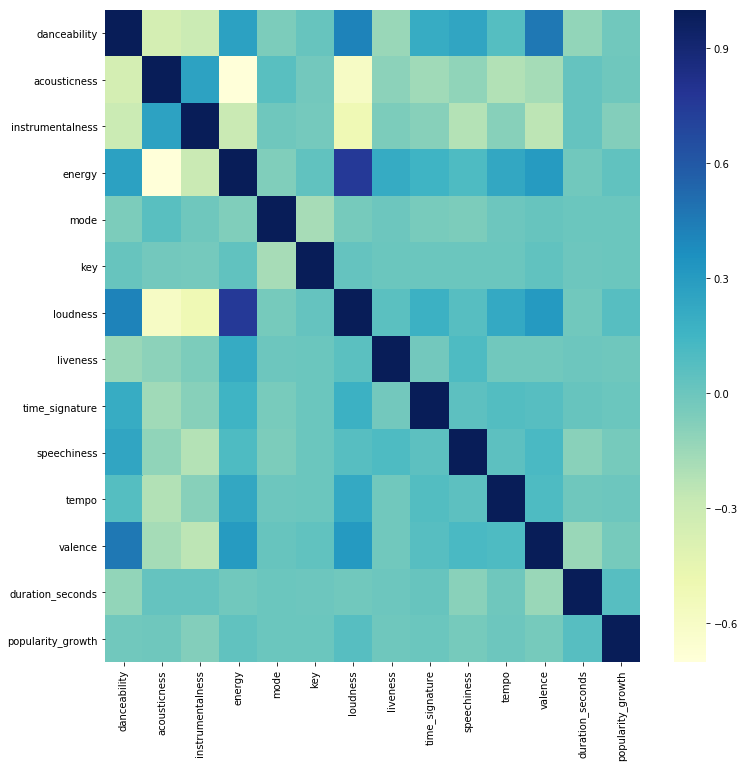

In [19]:
fig = plt.figure(figsize = (12, 12))
data_small = data[["danceability", "acousticness", "instrumentalness", "energy", "mode", "key", "loudness", "liveness", "time_signature", "speechiness", "tempo", "valence", "duration_seconds", "popularity_growth"]]
corr = data_small.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu")

No clear correlation between popularity growth and any other feature from this matrix.

### Create a column to classify whether a song grew in popularity (or remained at the same popularity level), or if a song declined in popularity

Created a new column for binary classification. If the song has maintained popularity or grown in popularity, a value of '1' is assigned. If the song has lost some of its popularity score, then it is given a '0'. 

In [20]:
data['popularity_maintain/growth'] = np.where((data['popularity_growth'] > -5), 1, 0)
data

,artist_name,track_name,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_april_2019,popularity_nov_2018,duration_seconds,popularity_growth,popularity_maintain/growth
0,YG,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,0.339,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15.0,44.0,238.373,-29.0,0
1,YG,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,0.557,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0.0,10.0,214.800,-10.0,0
2,R3HAB,Radio Silence,0.025000,0.603,0.723,0.000000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56.0,63.0,138.913,-7.0,0
3,Chris Cooq,Lactose,0.029400,0.800,0.579,0.912000,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0.0,9.0,125.381,-9.0,0
4,Chris Cooq,Same - Original mix,0.000035,0.783,0.792,0.878000,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0.0,8.0,124.016,-8.0,0
5,Curbo,Debauchery - Original mix,0.001150,0.810,0.417,0.919000,9,0.1060,-10.783,0,0.0793,120.025,4,0.8370,0.0,8.0,124.016,-8.0,0
6,Bingo Play,Grandma - Original mix,0.000539,0.819,0.720,0.863000,4,0.0727,-8.895,0,0.1510,124.003,4,0.9340,0.0,8.0,132.742,-8.0,0
7,G Herbo,Bon appétit,0.115000,0.885,0.348,0.000000,9,0.1070,-12.569,1,0.4510,142.111,4,0.1800,0.0,10.0,181.838,-10.0,0
8,34 Feet,Among - Original mix,0.000058,0.740,0.472,0.847000,8,0.0959,-9.008,1,0.0551,120.034,4,0.6220,0.0,8.0,124.016,-8.0,0
9,Chris Cooq,Hazard - Original mix,0.000081,0.813,0.731,0.910000,11,0.0727,-8.932,1,0.0697,124.031,4,0.9440,0.0,7.0,132.742,-7.0,0


### ML Algorithms to determine popularity maintenance/growth

We can now move on to ML Algorithms to determine whether a song will maintain popularity or not.

### Baseline score to beat

Let's say we guessed all values to be either 0 or 1. How many would these be?

In [21]:
data[data['popularity_maintain/growth'] == 0].shape[0]/data.shape[0] 

0.15526677560760513

In [22]:
data[data['popularity_maintain/growth'] == 1].shape[0]/data.shape[0] 

0.8447332243923948

This is the score we want to beat

### Logistic Regression

In [23]:
train, test = train_test_split(data, test_size = 0.2)
features = ["danceability", "acousticness", "instrumentalness", "key", "loudness", "speechiness", "tempo", "valence", "duration_seconds"]
x_train = train[features]
y_train = train["popularity_maintain/growth"]

x_test = test[features]
y_test = test["popularity_maintain/growth"]

In [24]:
LR = LogisticRegression(max_iter = 1500, solver='lbfgs')
LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred = LR.predict(x_test)
accuracy_score(y_test, y_pred)

0.8441120525678714

We're around the same as the baseline score

### Support Vector Machines

In [26]:
from sklearn.svm import LinearSVC

In [27]:
train, test = train_test_split(data, test_size = 0.2)
features = ["danceability", "acousticness", "instrumentalness", "key", "loudness", "speechiness", "tempo", "valence", "duration_seconds"]
x_train = train[features]
y_train = train["popularity_maintain/growth"]

x_test = test[features]
y_test = test["popularity_maintain/growth"]

In [28]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

scaler.fit(x_train)  
x_train = scaler.transform(x_train)  

x_test = scaler.transform(x_test)

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [29]:
SVM = LinearSVC(max_iter=10000, dual = False)  
SVM.fit(x_train, y_train)  

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [30]:
y_pred = SVM.predict(x_test)

accuracy_score(y_test, y_pred)

0.8436797509942936

Not a very great improvement, once again.

### Neural Networks

In [55]:
train, test = train_test_split(data, test_size = 0.1)
features = ["danceability", "acousticness", "instrumentalness", "key", "loudness", "speechiness", "tempo", "valence", "duration_seconds"]
x_train = train[features]
y_train = train["popularity_maintain/growth"]

x_test = test[features]
y_test = test["popularity_maintain/growth"]

In [73]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

scaler.fit(x_train)  
x_train = scaler.transform(x_train)  

x_test = scaler.transform(x_test)

c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
c:\users\rohan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [92]:
nn = MLPClassifier(hidden_layer_sizes=(15,20,15),max_iter=20000, verbose=True, momentum = 0.9, random_state=0)

In [93]:
nn.fit(x_train, y_train)

Iteration 1, loss = 0.48278519
Iteration 2, loss = 0.42348252
Iteration 3, loss = 0.42052363
Iteration 4, loss = 0.41864311
Iteration 5, loss = 0.41771596
Iteration 6, loss = 0.41699973
Iteration 7, loss = 0.41661496
Iteration 8, loss = 0.41610866
Iteration 9, loss = 0.41562937
Iteration 10, loss = 0.41533201
Iteration 11, loss = 0.41499282
Iteration 12, loss = 0.41476776
Iteration 13, loss = 0.41448070
Iteration 14, loss = 0.41434434
Iteration 15, loss = 0.41409124
Iteration 16, loss = 0.41390184
Iteration 17, loss = 0.41377627
Iteration 18, loss = 0.41359768
Iteration 19, loss = 0.41342620
Iteration 20, loss = 0.41326397
Iteration 21, loss = 0.41309982
Iteration 22, loss = 0.41291235
Iteration 23, loss = 0.41286738
Iteration 24, loss = 0.41279371
Iteration 25, loss = 0.41260510
Iteration 26, loss = 0.41249789
Iteration 27, loss = 0.41238442
Iteration 28, loss = 0.41223129
Iteration 29, loss = 0.41225303
Iteration 30, loss = 0.41198213
Iteration 31, loss = 0.41184426
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 20, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [94]:
y_pred = nn.predict(x_test)
accuracy_score(y_test, y_pred)

0.8435932906795781

This isn't doing great either

### Random Forest Classifier

In [63]:
train, test = train_test_split(data, test_size = 0.2)
features = ["danceability", "acousticness", "instrumentalness", "key", "loudness", "speechiness", "tempo", "valence", "duration_seconds"]
x_train = train[features]
y_train = train["popularity_maintain/growth"]

x_test = test[features]
y_test = test["popularity_maintain/growth"]

In [64]:
RF = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=0, verbose=1)  
RF.fit(x_train, y_train)  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.4min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=1, warm_start=False)

In [65]:
y_pred = RF.predict(x_test)
accuracy_score(y_test, y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.7s finished


0.8477001556285665

This is the best model so far. Maybe if we tweak our Neural network parameters we can do better with that.